In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set the path to your dataset
data_dir = r'D:\Dataset\images_train_test_val'
test_dir = os.path.join(data_dir, 'test')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Define image size and batch size
IMG_SIZE = 256
BATCH_SIZE = 32
NUM_CLASSES = 21

# Define data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load testing data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.backend import clear_session

In [3]:
print(train_data.class_indices)

{'agricultural': 0, 'airplane': 1, 'baseballdiamond': 2, 'beach': 3, 'buildings': 4, 'chaparral': 5, 'denseresidential': 6, 'forest': 7, 'freeway': 8, 'golfcourse': 9, 'harbor': 10, 'intersection': 11, 'mediumresidential': 12, 'mobilehomepark': 13, 'overpass': 14, 'parkinglot': 15, 'river': 16, 'runway': 17, 'sparseresidential': 18, 'storagetanks': 19, 'tenniscourt': 20}


In [4]:
NUM_CLASSES = len(train_data.class_indices)  # Dynamically set the number of classes

In [5]:
clear_session()

# Build the model again
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train_data, validation_data=val_data, epochs=2)

Epoch 1/2


D:\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 209s 898ms/step - accuracy: 0.0612 - loss: 3.1738 - val_accuracy: 0.1648 - val_loss: 2.6598
Epoch 2/2
230/230 ━━━━━━━━━━━━━━━━━━━━ 220s 954ms/step - accuracy: 0.2291 - loss: 2.5099 - val_accuracy: 0.3690 - val_loss: 2.0747


In [7]:
color_map = {
    "agricultural": (255, 0, 0),        # Red
    "airplane": (0, 255, 0),            # Green
    "baseballdiamond": (0, 0, 255),     # Blue
    "beach": (255, 255, 0),             # Yellow
    "buildings": (255, 0, 255),         # Magenta
    "chaparral": (0, 255, 255),         # Cyan
    "denseresidential": (128, 0, 0),    # Dark Red
    "forest": (0, 128, 0),              # Dark Green
    "freeway": (0, 0, 128),             # Dark Blue
    "golfcourse": (128, 128, 0),        # Olive
    "intersection": (128, 0, 128),      # Purple
    "mediumresidential": (0, 128, 128), # Teal
    "mobilehomepark": (192, 192, 192),  # Silver
    "overpass": (128, 128, 128),        # Gray
    "parkinglot": (255, 165, 0),        # Orange
    "river": (70, 130, 180),            # Steel Blue
    "runway": (0, 255, 127),            # Spring Green
    "sparseresidential": (255, 20, 147),# Deep Pink
    "storagetanks": (75, 0, 130),       # Indigo
    "tenniscourt": (244, 164, 96),      # Sandy Brown
    "harbor": (0, 255, 255)             # Cyan
}

# Function to convert the class output to color
def class_to_color(class_idx):
    for key, value in color_map.items():
        if train_data.class_indices[key] == class_idx:
            return value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


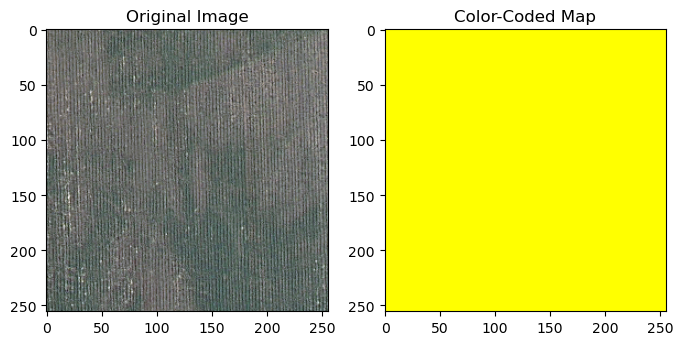

In [9]:
from PIL import Image

def predict_and_visualize(image_path):
    # Load and preprocess the input image
    img = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Generate the color-coded map
    color = class_to_color(predicted_class)
    
    # Create a color-coded image
    color_image = np.full((IMG_SIZE, IMG_SIZE, 3), color, dtype=np.uint8)

    # Show the original and color-coded images
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title('Color-Coded Map')
    plt.imshow(color_image)
    
    plt.show()

# Test the function with a random image
predict_and_visualize(r"../SampleImages/agricultural.png")